# IDR2.1 night 2458106 Waterfall Plots

Katherine Elder

The first part of this notebook is creating waterfall plots of the various data files in IDR2.1, night 2458106. 

The second part is plotting the delay spectrum, visibility spectrum, and waterfall of the ratios of polarizations.

In [1]:
#Initialize matplotlib notebook
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.time import Time
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uvxy = UVData()
uvyx = UVData()
uvxx = UVData()
uvyy = UVData()

#Define variables for the antenna pair we are looking at
ant1 = 11
ant2 = 65

#Create variables to set where the array will start printing and how many steps it goes by
start_index = 500
step = 50


## Part 1: Waterfall plots

We plot waterfalls of the data files in for various stages of the pipeline to see what changes as more calibrations are run. To do this, we first make a list of all the files we want to look at, then step through each file and read in the data and times. Lastly, we convert the JDs to LSTs. 

In [2]:
#Create a list for the xy data
xy_files = glob.glob('/data6/HERA/data/IDR2.1/2458106/xy_files/xy_uv_to_uvfits/*.uvfits')
xy_files.sort()

In [3]:
#Set first to true to initialize the array
first = True
xy_array = []

for my_file in xy_files:
    #Read in the given file for the set antenna pair
    uvxy.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #Unphase the data
    uvxy.unphase_to_drift()
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvxy.get_data((ant1,ant2))
    #Get the times of the antennas
    times = uvxy.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first == True:
        print('setting full for first time')
        xy_array = temp_array
        xy_timearr = times
        first = False
    else:
        #print('vstacking...')
        xy_array = np.vstack((xy_array, temp_array))
        xy_timearr = np.hstack((xy_timearr,times))

print 'Array shape:', xy_array.shape
print 'Time shape:', xy_timearr.shape
   

setting full for first time
Array shape: (840, 1024)
Time shape: (840,)


In [4]:
#Convert the times from julian date to LST
lat, lon, alt = uvxy.telescope_location_lat_lon_alt_degrees
t = Time(xy_timearr, format = 'jd', location = (lon,lat))
#print xy_timearr.shape
xy_lstarray = t.sidereal_time(kind = 'apparent').hour

#Print the LST array to verify the conversion worked
#print lstarray

<IPython.core.display.Javascript object>


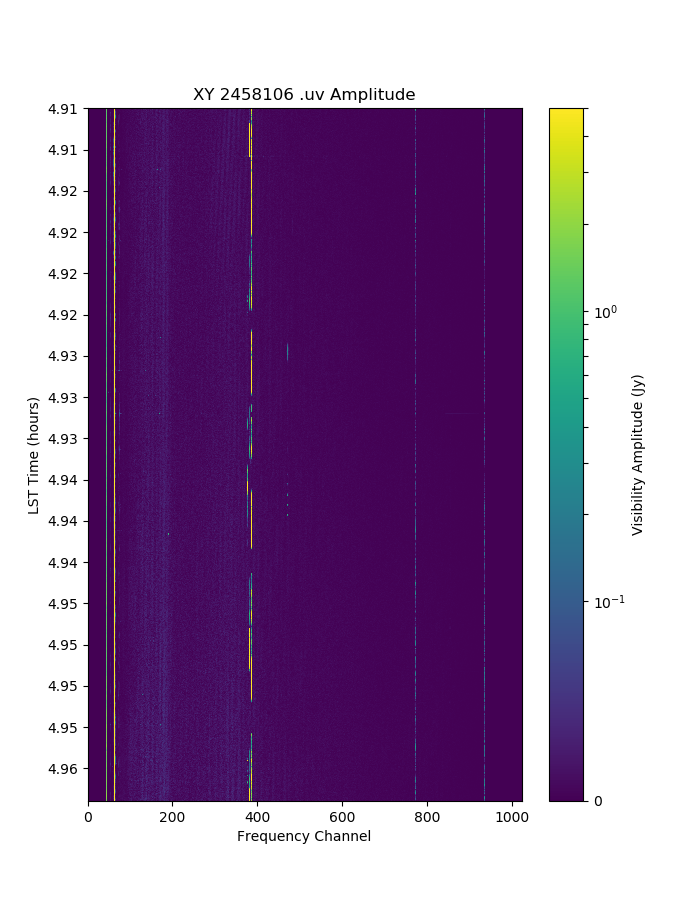

In [45]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(xy_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=5,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xy_lstarray),step), np.round(xy_lstarray*100)/100)
plt.colorbar(label = 'Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XY 2458106 .uv Amplitude')
plt.show()

In [6]:
#Create a list of the yx data
yx_files = glob.glob('/data6/HERA/data/IDR2.1/2458106/yx_files/yx_uv_to_uvfits/*.uvfits')
yx_files.sort()
#Print the list to verify it is working
#print folders2

In [7]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
yx_array = []

for my_file in yx_files:
    #Read in the given data file for the chosen antenna pair
    uvyx.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvyx.get_data((ant1,ant2))
    #Get the times of the antenna
    times = uvyx.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        yx_array = temp_array
        yx_timearr = times
        first = False
    else:
        #print('vstacking...')
        yx_array = np.vstack((yx_array, temp_array))
        yx_timearr = np.hstack((yx_timearr,times))

print 'Array shape:', yx_array.shape
print 'Time shape:', yx_timearr.shape

setting full for first time
Array shape: (840, 1024)
Time shape: (840,)


<IPython.core.display.Javascript object>


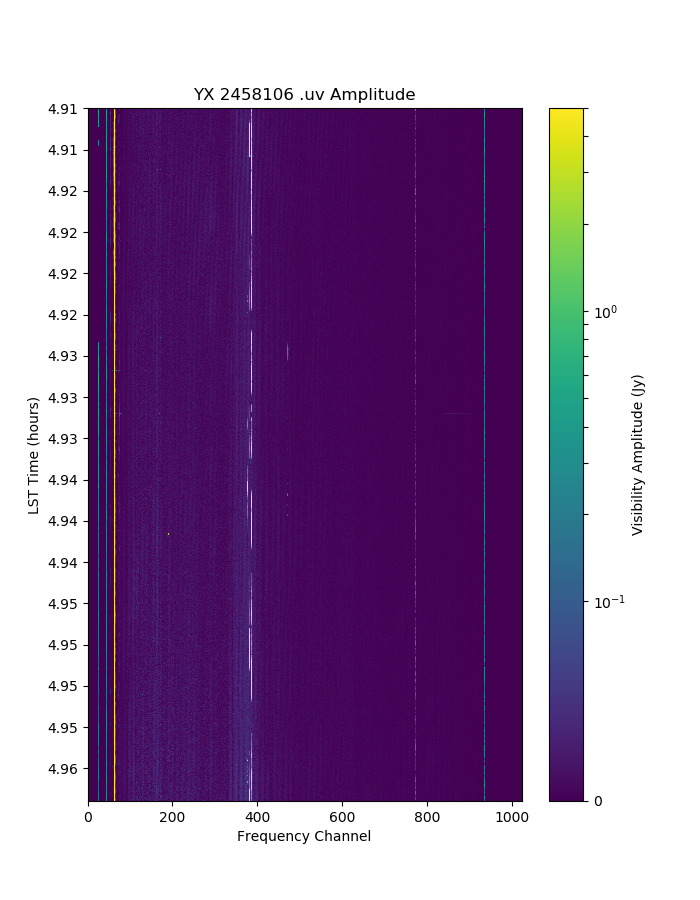

In [46]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yx_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=5,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xy_lstarray),step), np.round(xy_lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX 2458106 .uv Amplitude')
plt.show()

Now that we have been able to read in and plot the entire night of cross pol data, let's plot them side by side. We will lock the axes together so that when we zoom in on one plot, it zooms in on the other as well. 

<IPython.core.display.Javascript object>


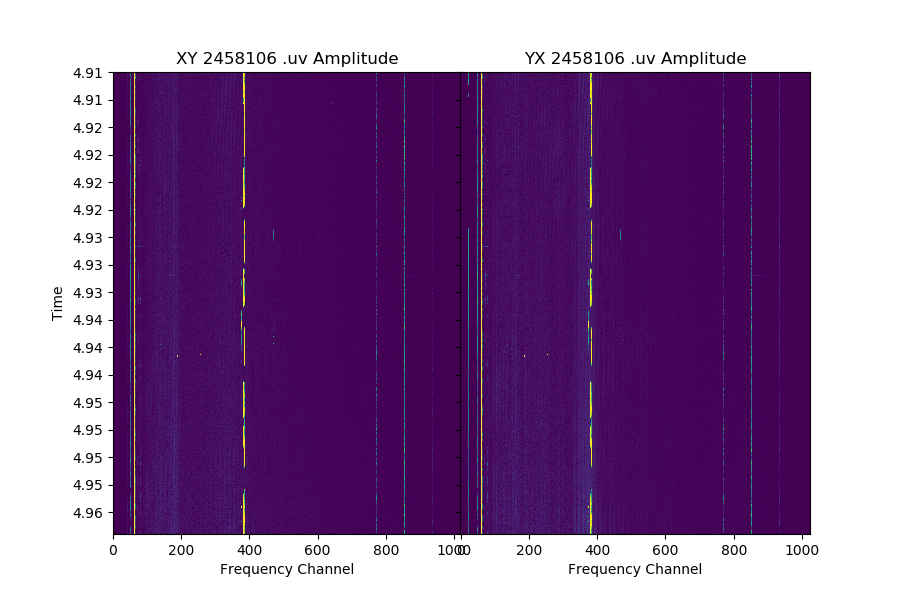

In [47]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(xy_array),aspect='auto',norm=SymLogNorm(vmin=0,vmax=5,linthresh=.1))
plt.yticks(np.arange(0,len(xy_lstarray),step), np.round(xy_lstarray*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XY 2458106 .uv Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(yx_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=5,linthresh=.1))
plt.yticks(np.arange(0,len(xy_lstarray),step), np.round(xy_lstarray*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YX 2458106 .uv Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

In [16]:
#Create a list of the xx data
xx_files = glob.glob('/data6/HERA/data/IDR2.1/2458106/xx_files/xx_uv_to_uvfits/*.uvfits')
xx_files.sort()
#Print the list to verify it is working
#print folders2

In [17]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
xx_array = []

for my_file in xx_files:
    #Read in the given data file for the chosen antenna pair
    uvxx.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvxx.get_data((ant1,ant2))
    #Get the times of the antenna
    times = uvxx.get_times(ant1,ant2)
    ind=uvxx.antpair2ind(ant1,ant2)
    temptime=uvxx.lst_array[ind]
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        xx_array = temp_array
        xx_timearr = times
        first = False
    else:
        #print('vstacking...')
        xx_array = np.vstack((xx_array, temp_array))
        xx_timearr = np.hstack((xx_timearr,temptime))

print('Array shape:')
print(xx_array.shape)
print('Time shape:')
print(xx_timearr.shape)

setting full for first time
Array shape:
(600, 1024)
Time shape:
(600,)


In [18]:
#Convert the times from julian date to LST
latxx, lonxx, altxx = uvxx.telescope_location_lat_lon_alt_degrees
t = Time(xx_timearr, format='jd', location=(lonxx,latxx))
xx_lstarray = t.sidereal_time('apparent').hour
#Print the LST array to verify the conversion worked
#print lstarray

<IPython.core.display.Javascript object>


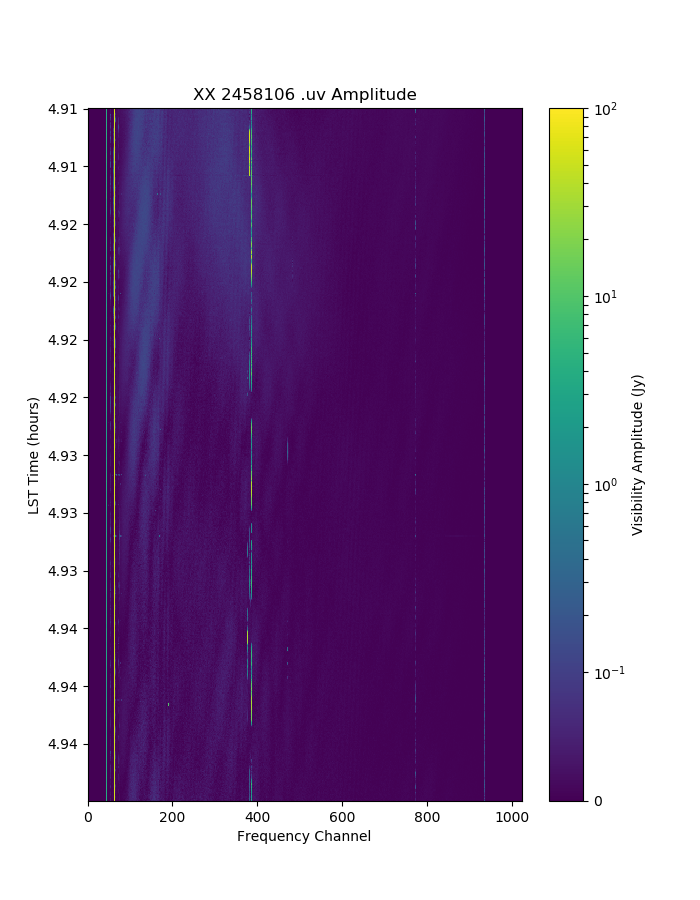

In [19]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(xx_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xx_lstarray),step), np.round(xx_lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uv Amplitude')
plt.show()

In [20]:
#Create a list of the yy data
yy_files=glob.glob('/data6/HERA/data/IDR2.1/2458106/yy_files/yy_uv_to_uvfits/*.uvfits')
yy_files.sort()
#Print the list to verify it is working
#print folders2

In [21]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
yy_array = []

for my_file in yy_files:
    #Read in the given data file for the chosen antenna pair
    uvyy.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvyy.get_data((ant1,ant2))
    #Get the times of the antenna
    ind = uvyy.antpair2ind(ant1,ant2)
    temptime = uvyy.lst_array[ind]
    #Check if the array has already been initialized
    if first == True:
        print('setting full for first time')
        yy_array = temp_array
        yy_timearr = temptime
        first = False
    else:
        #print('vstacking...')
        yy_array = np.vstack((yy_array, temp_array))
        yy_timearr = np.hstack((yy_timearr, temptime))

print('Array shape:')
print(yy_array.shape)
print('Time shape:')
print(yy_timearr.shape)

setting full for first time
Array shape:
(600, 1024)
Time shape:
(600,)


<IPython.core.display.Javascript object>


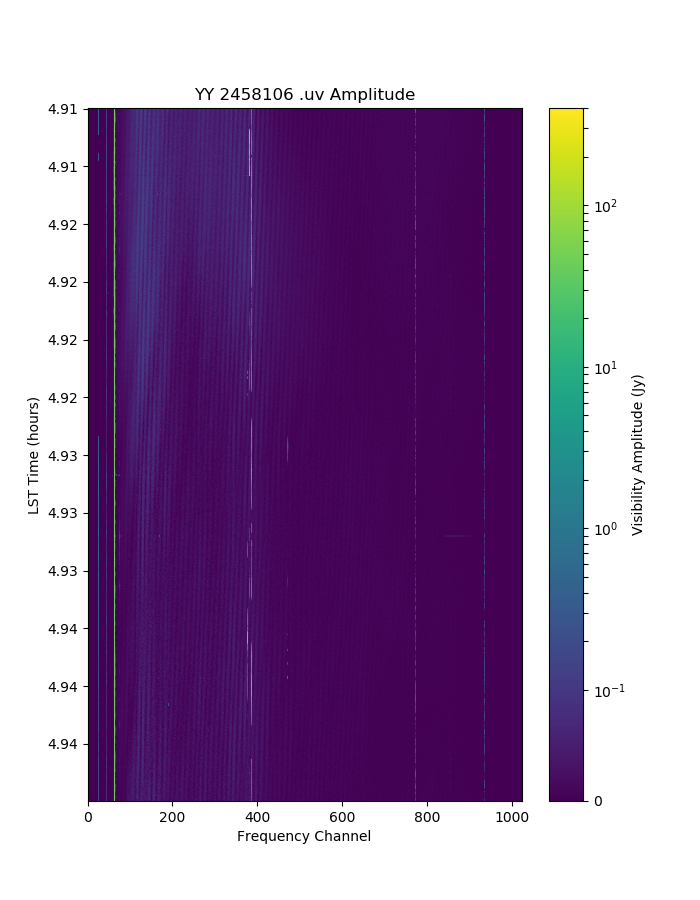

In [22]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yy_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=400,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xx_lstarray),step), np.round(xx_lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uv Amplitude')
plt.show()

<IPython.core.display.Javascript object>


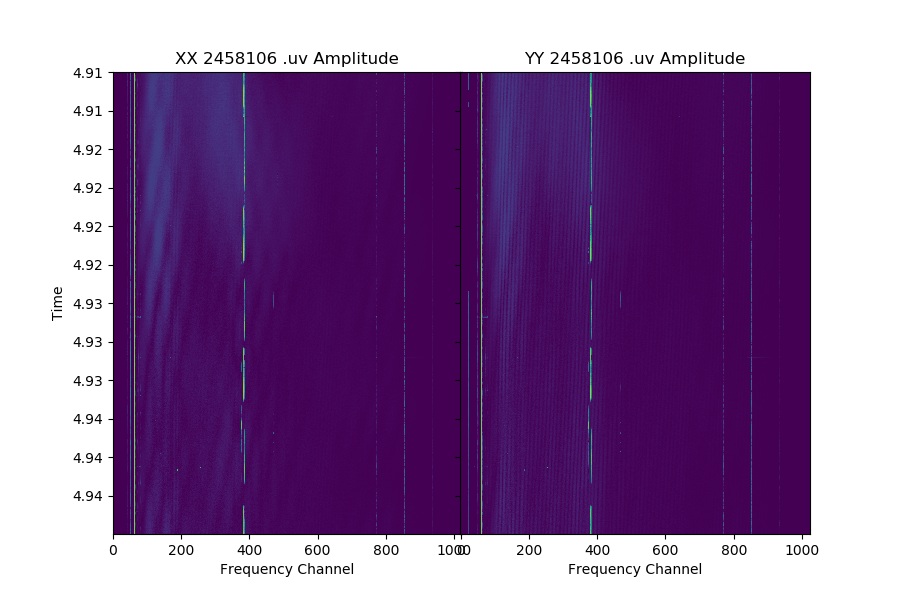

In [23]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(xx_array),aspect='auto',norm=SymLogNorm(vmin=0,vmax=400,linthresh=.1))
plt.yticks(np.arange(0,len(xx_lstarray),step), np.round(xx_lstarray*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uv Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(yy_array), aspect='auto', norm=SymLogNorm(vmin=0,vmax=400,linthresh=.1))
plt.yticks(np.arange(0,len(xx_lstarray),step), np.round(xx_lstarray*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uv Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

In [31]:
#Create a list of the xx .uvOCRS data
yy_ocrs_files = glob.glob('/data6/HERA/data/IDR2.1/2458106/yy_files/yy_uvOCRS_to_uvfits/*.uvfits')
yy_ocrs_files.sort()

uvyyocrs = UVData()

#Create a list of the yx data
xx_ocrs_files = glob.glob('/data6/HERA/data/IDR2.1/2458106/xx_files/xx_uvOCRS_to_uvfits/*.uvfits')
xx_ocrs_files.sort()

uvxxocrs = UVData()

In [32]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
waterfall_ma = []

for my_file in xx_ocrs_files:
    #Read in the given data file for the chosen antenna pair
    uvxxocrs.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvxxocrs.get_data((ant1,ant2))
    #temp_ma_array = np.ma.array(data = temp_array, mask = uvxxocrs.flag_array)
    #Get the times of the antenna
    ind = uvxxocrs.antpair2ind(ant1,ant2)
    temptime = uvxxocrs.lst_array[ind]
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        waterfall_ma = temp_array
        xx_ocrs_timearr = temptime
        first = False
    else:
        #print('vstacking...')
        waterfall_ma = np.vstack((waterfall_ma, temp_array))
        xx_ocrs_timearr = np.hstack((xx_ocrs_timearr, temptime))

print('Array shape:')
print(waterfall_ma.shape)
print('Time shape:')
print(xx_ocrs_timearr.shape)

setting full for first time
Array shape:
(840, 1024)
Time shape:
(840,)


In [33]:
#Convert the times from julian date to LST
lat_xx_ocrs, lon_xx_ocrs, alt_xx_ocrs = uvxxocrs.telescope_location_lat_lon_alt_degrees
t = Time(xx_ocrs_timearr, format='jd', location=(lon_xx_ocrs,lat_xx_ocrs))
lstarray_xx_ocrs = t.sidereal_time('apparent').hour
#Print the LST array to verify the conversion worked
#print lstarraygy

<IPython.core.display.Javascript object>


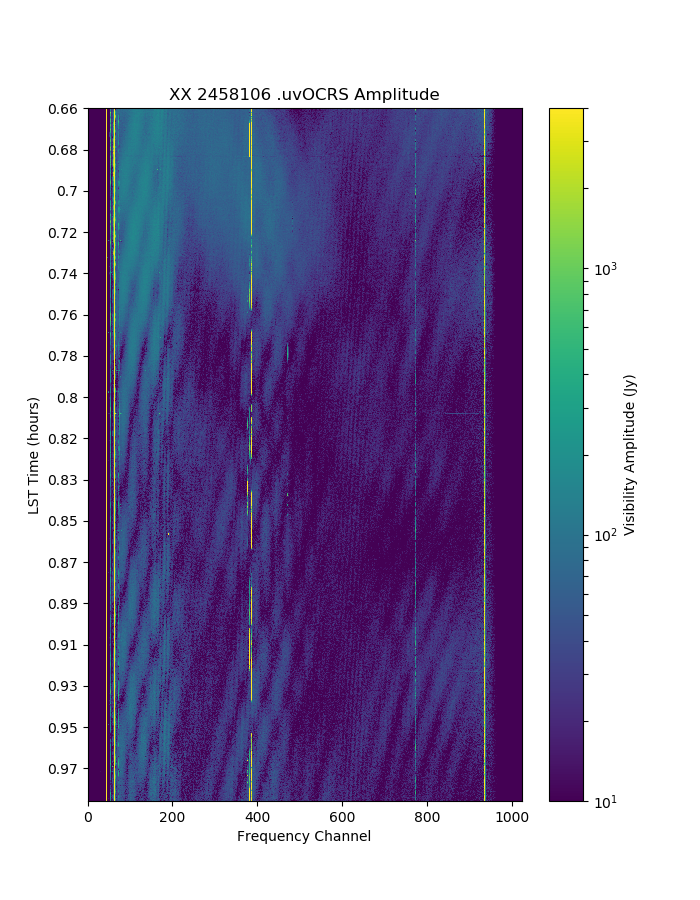

In [34]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(waterfall_ma), aspect='auto', norm=SymLogNorm(vmin=10,vmax=4000,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray_xx_ocrs),50), np.round(lstarray_xx_ocrs*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uvOCRS Amplitude')
plt.show()

In [35]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
waterfall_ma_yy = []

for my_file in yy_ocrs_files:
    #Read in the given data file for the chosen antenna pair
    uvyyocrs.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvyyocrs.get_data((ant1,ant2))
    #temp_ma_array = np.ma.array(data=temp_array,mask=uvyyocrs.flag_array)
    #Get the times of the antenna
    ind = uvyyocrs.antpair2ind(ant1,ant2)
    temptime = uvyyocrs.lst_array[ind]
    #Check if the array has already been initialized
    if first == True:
        print('setting full for first time')
        waterfall_ma_yy = temp_array
        yy_ocrs_timearr = temptime
        first = False
    else:
        #print('vstacking...')
        waterfall_ma_yy = np.vstack((waterfall_ma_yy, temp_array))
        yy_ocrs_timearr = np.hstack((yy_ocrs_timearr,temptime))

print('Array shape:')
print(waterfall_ma_yy.shape)
print('Time shape:')
print(yy_ocrs_timearr.shape)

setting full for first time
Array shape:
(840, 1024)
Time shape:
(840,)


<IPython.core.display.Javascript object>


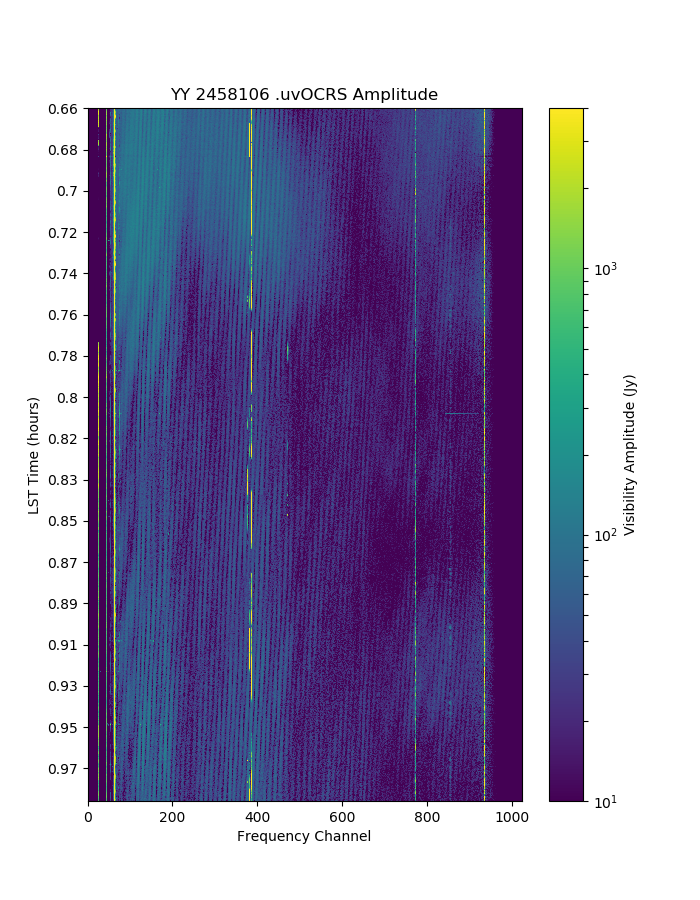

In [36]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(waterfall_ma_yy), aspect='auto', norm=SymLogNorm(vmin=10,vmax=4000,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray_xx_ocrs),50), np.round(lstarray_xx_ocrs*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uvOCRS Amplitude')
plt.show()

<IPython.core.display.Javascript object>


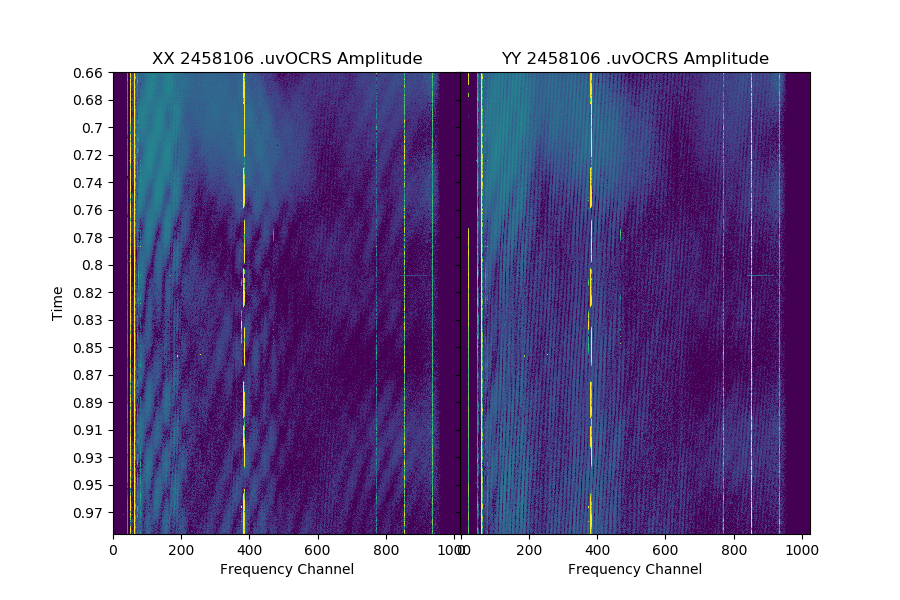

In [37]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(waterfall_ma),aspect='auto',norm=SymLogNorm(vmin=10,vmax=4000,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray_xx_ocrs),step), np.round(lstarray_xx_ocrs*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uvOCRS Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(waterfall_ma_yy), aspect='auto', norm=SymLogNorm(vmin=10,vmax=4000,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray_xx_ocrs),step), np.round(lstarray_xx_ocrs*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uvOCRS Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

## Part 2: Visibility Spectra, Delay Spectra, Ratios

Next, we look at the visibility spectrum to check how much of the noise seen is caused by delay in the signal. After that, we look at the delay spectrum to see the amplitudes. Lastly, we take the ratio of the waterfall plots to see how different the data for the different polarizations are. 

<IPython.core.display.Javascript object>


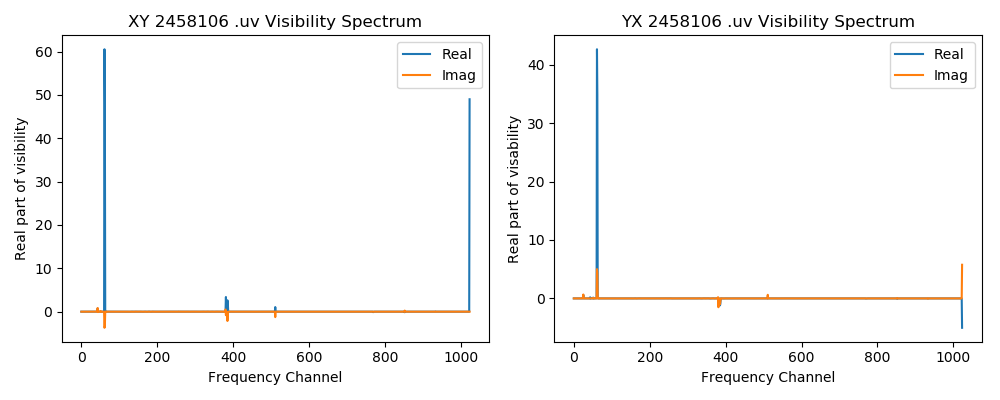

In [10]:
#Plot the xy and yx .uv visibility spectra
plt.figure(figsize=(10,4))
#Take the mean of the time axis and plot both real and imaginary parts
plt.subplot(121)
plt.plot(np.mean(xy_array, axis=0).real, label='Real')
plt.plot(np.mean(xy_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.title('XY 2458106 .uv Visibility Spectrum')
plt.legend()

plt.subplot(122)
plt.plot(np.mean(yx_array, axis=0).real, label='Real')
plt.plot(np.mean(yx_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency Channel')
plt.title('YX 2458106 .uv Visibility Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


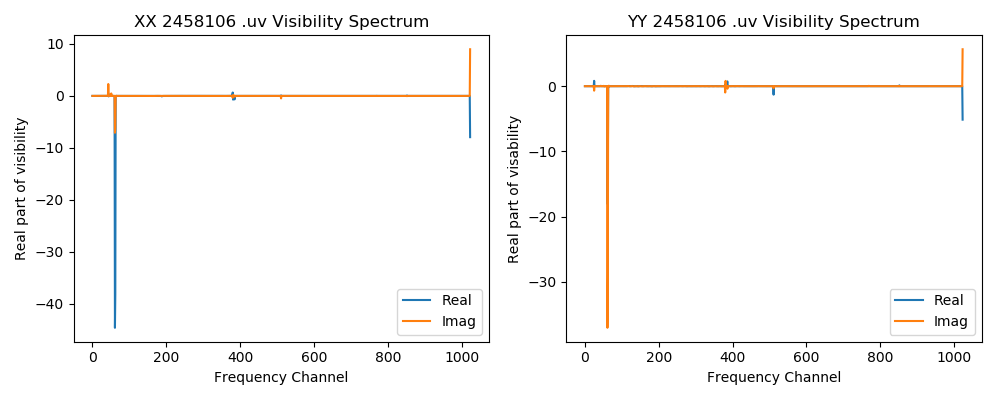

In [24]:
#Plot the xx and yy .uv visibility spectra
plt.figure(figsize=(10,4))
#Take the mean of the time axis and plot both real and imaginary parts
plt.subplot(121)
plt.plot(np.mean(xx_array, axis=0).real, label='Real')
plt.plot(np.mean(xx_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uv Visibility Spectrum')
plt.legend()

plt.subplot(122)
plt.plot(np.mean(yy_array, axis=0).real, label='Real')
plt.plot(np.mean(yy_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uv Visibility Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


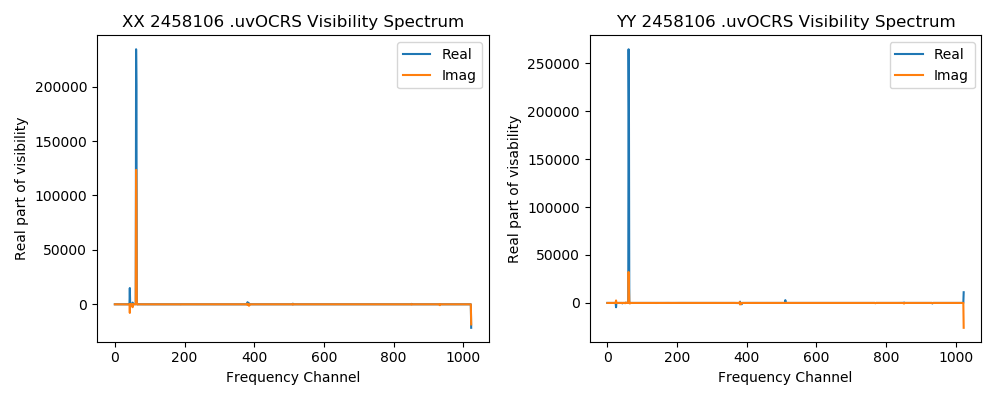

In [38]:
#Plot the xx and yy .uvOCRS visibility spectra
plt.figure(figsize=(10,4))
#Take the mean of the time axis and plot both real and imaginary parts
plt.subplot(121)
plt.plot(np.mean(waterfall_ma, axis=0).real, label='Real')
plt.plot(np.mean(waterfall_ma, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.title('XX 2458106 .uvOCRS Visibility Spectrum')
plt.legend()

plt.subplot(122)
plt.plot(np.mean(waterfall_ma_yy, axis=0).real, label='Real')
plt.plot(np.mean(waterfall_ma_yy, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency Channel')
plt.title('YY 2458106 .uvOCRS Visibility Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
#Take the time average of the xy .uv data
vis_avg_xy = np.mean(xy_array, axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay_xy = np.fft.fftshift(np.fft.fft(vis_avg_xy))

# 2) Find the frequency width of a channel in GHz
freq_width_xy = np.diff(uvxy.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_xy = np.fft.fftshift(np.fft.fftfreq(uvxy.Nfreqs,freq_width_xy))*1e9

In [64]:
#Take the time average of the yx .uv data
vis_avg_yx = np.mean(yx_array, axis=0)

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay_yx = np.fft.fftshift(np.fft.fft(vis_avg_yx))

# 2) Find the frequency width of a channel in GHz
freq_width_yx = np.diff(uvyx.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_yx = np.fft.fftshift(np.fft.fftfreq(uvyx.Nfreqs,freq_width_yx))*1e9

<IPython.core.display.Javascript object>


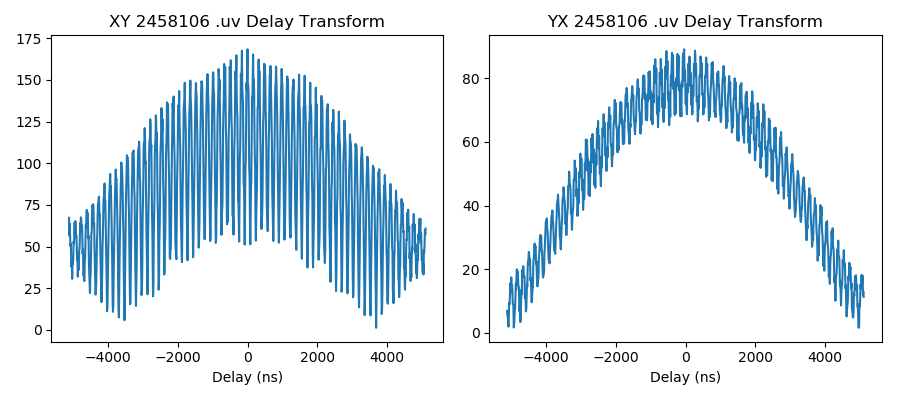

In [13]:
#Plot the xy and yx .uv delay spectra

plt.figure(figsize=(9,4))

plt.subplot(121)
plt.plot(delays_xy,np.abs(vis_avg_delay_xy))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
#plt.ylim(0,900)
plt.title('XY 2458106 .uv Delay Transform');

plt.subplot(122)
plt.plot(delays_yx,np.abs(vis_avg_delay_yx))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YX 2458106 .uv Delay Transform');

plt.tight_layout()

In [25]:
#Take the time average of the xx .uv data
vis_avg_xx = np.mean(xx_array, axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay_xx = np.fft.fftshift(np.fft.fft(vis_avg_xx))

# 2) Find the frequency width of a channel in GHz
freq_width_xx = np.diff(uvxx.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_xx = np.fft.fftshift(np.fft.fftfreq(uvxx.Nfreqs,freq_width_xx))*1e9

In [65]:
#Take the time average of the yy .uv data
vis_avg_yy = np.mean(yy_array, axis=0)

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay_yy = np.fft.fftshift(np.fft.fft(vis_avg_yy))

# 2) Find the frequency width of a channel in GHz
freq_width_yy = np.diff(uvyy.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_yy = np.fft.fftshift(np.fft.fftfreq(uvyy.Nfreqs,freq_width_yy))*1e9

<IPython.core.display.Javascript object>


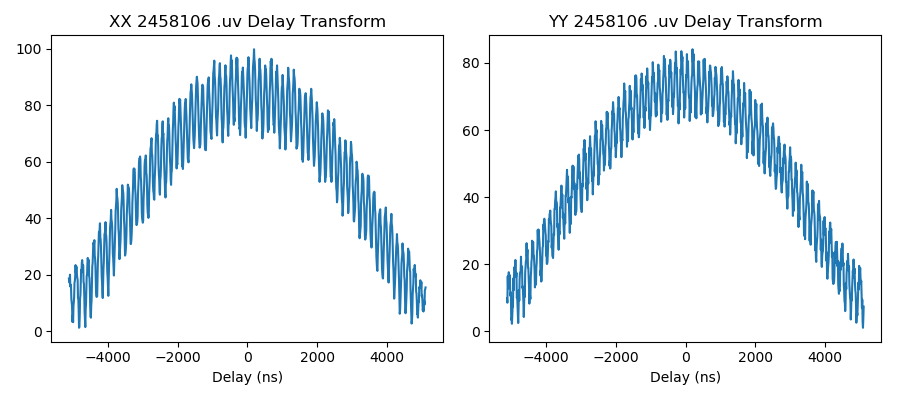

In [27]:
#Plot the xx and yy .uv delay spectra

plt.figure(figsize=(9,4))

plt.subplot(121)
plt.plot(delays_xx,np.abs(vis_avg_delay_xx))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
#plt.ylim(0,900)
plt.title('XX 2458106 .uv Delay Transform');

plt.subplot(122)
plt.plot(delays_yy,np.abs(vis_avg_delay_yy))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YY 2458106 .uv Delay Transform');

plt.tight_layout()

In [39]:
# Take the time average of the xx .uvOCRS data
vis_avg_xx_ocrs = np.mean(waterfall_ma, axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay_xx_ocrs = np.fft.fftshift(np.fft.fft(vis_avg_xx_ocrs))

# 2) Find the frequency width of a channel in GHz
freq_width_xx_ocrs = np.diff(uvxxocrs.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_xx_ocrs = np.fft.fftshift(np.fft.fftfreq(uvxxocrs.Nfreqs,freq_width_xx_ocrs))*1e9

In [66]:
#Take the time average of the yy .uvOCRS data
vis_avg_yy_ocrs = np.mean(waterfall_ma_yy, axis=0)

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay_yy_ocrs = np.fft.fftshift(np.fft.fft(vis_avg_yy_ocrs))

# 2) Find the frequency width of a channel in GHz
freq_width_yy_ocrs = np.diff(uvyyocrs.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_yy_ocrs = np.fft.fftshift(np.fft.fftfreq(uvyyocrs.Nfreqs,freq_width_yy_ocrs))*1e9

<IPython.core.display.Javascript object>


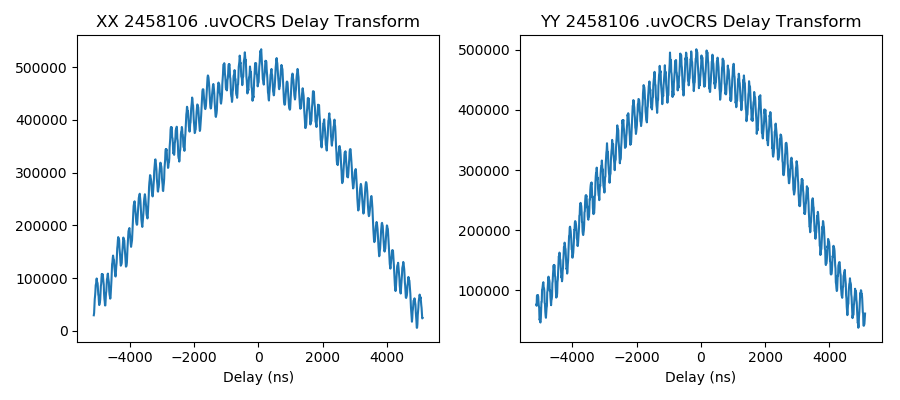

In [41]:
#Plot the xx and yy .uvOCRS delay spectra

plt.figure(figsize=(9,4))

plt.subplot(121)
plt.plot(delays_xx_ocrs,np.abs(vis_avg_delay_xx_ocrs))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
#plt.ylim(0,900)
plt.title('XX 2458106 .uvOCRS Delay Transform');

plt.subplot(122)
plt.plot(delays_yy_ocrs,np.abs(vis_avg_delay_yy_ocrs))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YY 2458106 .uvOCRS Delay Transform');

plt.tight_layout()

<IPython.core.display.Javascript object>


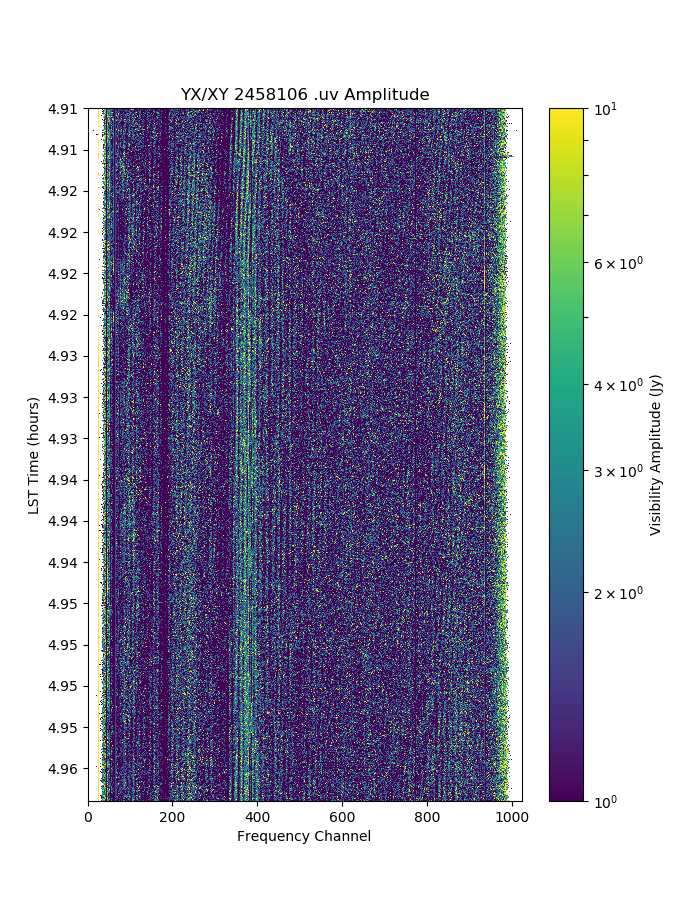

divide by zero encountered in divide
invalid value encountered in divide


In [53]:
#Plot the ratio of the yx and xy .uv amplitude waterfall
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yx_array)/np.abs(xy_array), aspect='auto', norm=SymLogNorm(vmin=1,vmax=10,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xy_lstarray),step), np.round(xy_lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX/XY 2458106 .uv Amplitude')
plt.show()

In [15]:
#Print the gain of the ratio above
gain = np.average(np.abs(yx_array))/np.average(np.abs(xy_array))
print gain

0.8956502


<IPython.core.display.Javascript object>


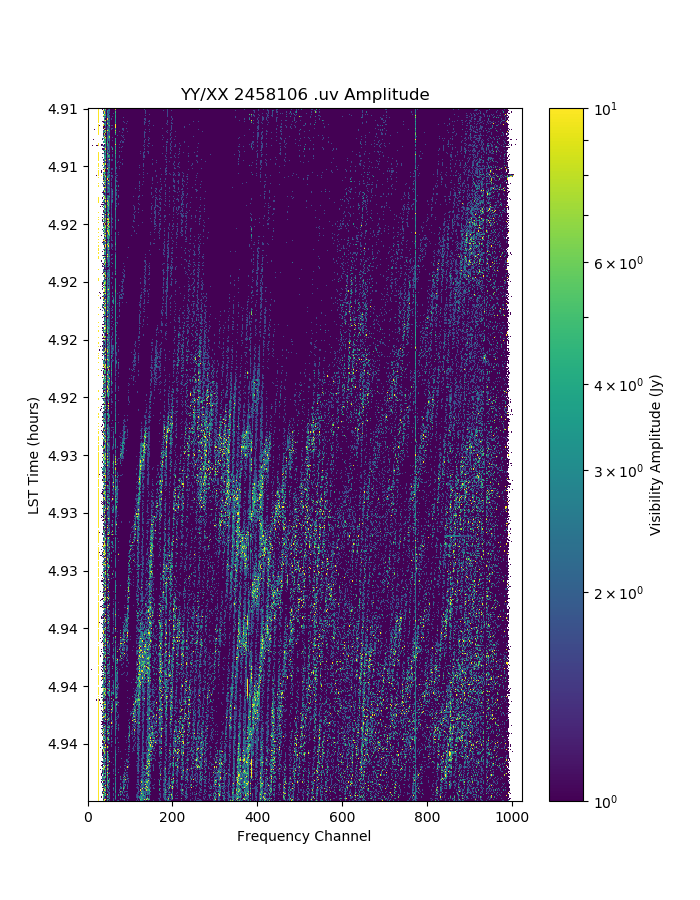

divide by zero encountered in divide
invalid value encountered in divide


In [55]:
#Plot the ratio of the yy and xx .uv amplitude waterfalls
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yy_array)/np.abs(xx_array), aspect='auto', norm=SymLogNorm(vmin=1,vmax=10,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xx_lstarray),step), np.round(xx_lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YY/XX 2458106 .uv Amplitude')
plt.show()

In [61]:
#Print the gain of the ratio above
gain = np.average(np.abs(yy_array))/np.average(np.abs(xx_array))
print gain

0.8255059


<IPython.core.display.Javascript object>


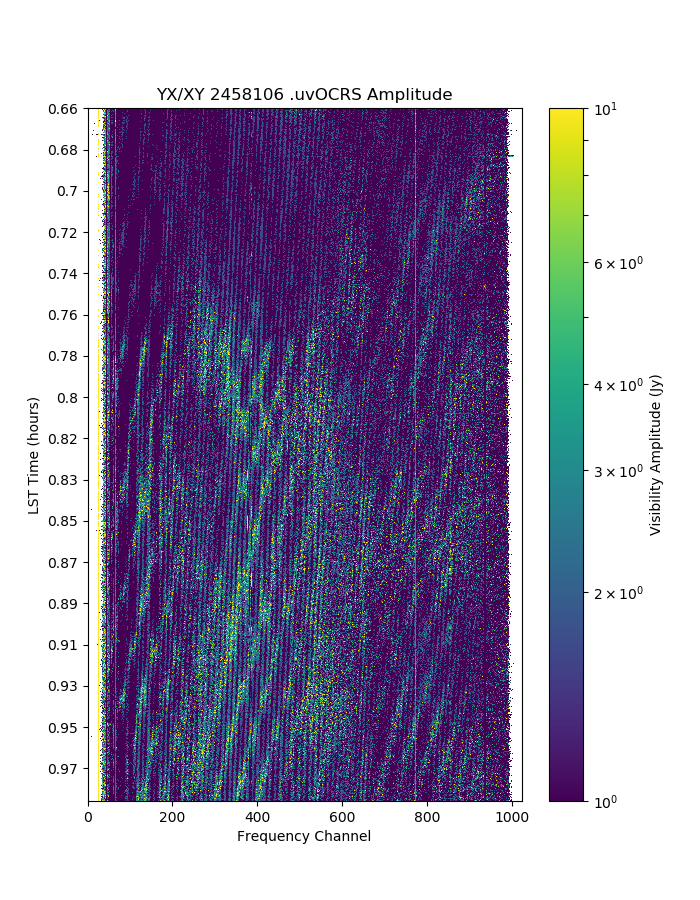

divide by zero encountered in divide
invalid value encountered in divide


In [57]:
#Plot the yy and xx .uvOCRS amplitude waterfalls
plt.figure(figsize=(7,9))
plt.imshow(np.abs(waterfall_ma_yy)/np.abs(waterfall_ma), aspect='auto', norm=SymLogNorm(vmin=1,vmax=10,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray_xx_ocrs),step), np.round(lstarray_xx_ocrs*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX/XY 2458106 .uvOCRS Amplitude')
plt.show()

In [63]:
#Print the gain of the ratio above
gain2 = np.average(np.abs(waterfall_ma_yy))/np.average(np.abs(waterfall_ma))
print gain2

0.9543514
